Data Science Fundamentals: Python |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 13. | 
[WebScraping Project Part 1](./WebScrapingProjectPart1.ipynb) | [WebScraping Project Part 2](./WebScrapingProjectPart2.ipynb)  | **[WebScraping Project Part 3](./WebScrapingProjectPart3.ipynb)** | [WebScraping Project Final Code](./WebScrapingProjectFinalCode.ipynb)

- - -

# Parse HTML Code with Beautiful Soup

You’ve successfully scraped some HTML from the Internet, but when you look at it now, it just seems like a huge mess. There are tons of HTML elements here and there, thousands of attributes scattered around—and wasn’t there some JavaScript mixed in as well? It’s time to parse this lengthy code response with Beautiful Soup to make it more accessible and pick out the data that you’re interested in.

Beautiful Soup is a Python library for parsing structured data. It allows you to interact with HTML in a similar way to how you would interact with a web page using developer tools. Beautiful Soup exposes a couple of intuitive functions you can use to explore the HTML you received. To get started, lets make sure you have the Beautiful Soup library installed.

Then, import the library and create a Beautiful Soup object:

In [6]:
import requests
from bs4 import BeautifulSoup

URL = 'https://www.monster.com/jobs/search?q=Python+Developer&where=North+Carolina'
page = requests.get(URL)

print(page.content)

b'\n<!doctype html>\n<html>\n  <head>\n    <style data-styled="true" data-styled-version="5.2.1">.iSPpTg{display:inline-block;-webkit-text-decoration:none;text-decoration:none;}/*!sc*/\n.iSPpTg,.iSPpTg:visited{padding:7px 16px;border:2px solid #6e46ae;border-radius:4px;background-color:transparent;font-family:Proxima Nova,Helvetica,Arial,sans-serif;font-weight:600;font-size:14px;color:#6e46ae;line-height:18px;text-transform:none;}/*!sc*/\n.iSPpTg:focus{padding:7px 16px;border:2px solid #402965;border-radius:4px;background-color:#402965;font-family:Proxima Nova,Helvetica,Arial,sans-serif;font-weight:600;font-size:14px;color:#ffffff;line-height:18px;text-transform:none;}/*!sc*/\n.iSPpTg:hover{cursor:pointer;padding:7px 16px;border:2px solid #57378a;border-radius:4px;background-color:#57378a;font-family:Proxima Nova,Helvetica,Arial,sans-serif;font-weight:600;font-size:14px;color:#ffffff;line-height:18px;text-transform:none;}/*!sc*/\ndata-styled.g3[id="sc-dlfnbm"]{content:"iSPpTg,"}/*!sc*/

When you add the two new lines of code, you’re creating a Beautiful Soup object that takes the HTML content you scraped earlier as its input. When you instantiate the object, you also instruct Beautiful Soup to use the appropriate parser.

## Find Elements By ID

In an HTML web page, every element can have an id attribute assigned. As the name already suggests, that id attribute makes the element uniquely identifiable on the page. You can begin to parse your page by selecting a specific element by its ID.

Switch back to developer tools and identify the HTML object that contains all of the job postings. Explore by hovering over parts of the page and using right-click to Inspect.

The element you’re looking for is a < div > with an id attribute that has the value "ResultsContainer". It has a couple of other attributes as well, but below is the gist of what you’re looking for:

Beautiful Soup allows you to find that specific element easily by its ID:

In [64]:
results = soup.find_all('div', class_='card-view-panel')
print(results)

[]


For easier viewing, you can .prettify() any Beautiful Soup object when you print it out. If you call this method on the results variable that you just assigned above, then you should see all the HTML contained within the < div >:

In [46]:
print(results.prettify())

AttributeError: ResultSet object has no attribute 'prettify'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

When you use the element’s ID, you’re able to pick one element out from among the rest of the HTML. This allows you to work with only this specific part of the page’s HTML. It looks like the soup just got a little thinner! However, it’s still quite dense.

### Find Elements by HTML Class Name 

You’ve seen that every job posting is wrapped in a < section > element with the class card-content. Now you can work with your new Beautiful Soup object called results and select only the job postings. These are, after all, the parts of the HTML that you’re interested in! You can do this in one line of code:

In [60]:
job_elems = results.find_all('section', class_='results-card ')

AttributeError: 'NoneType' object has no attribute 'find_all'

<div class="results-card " name="jobId_5d7cb05d-cac8-4ad9-8374-ece5ea3b88ba" href="#5d7cb05d-cac8-4ad9-8374-ece5ea3b88ba" tabindex="-1"><div class="row"><div class="col-9 col-sm-9 col-md-9 col-lg-9 left-panel"><div class="row"><div class="col-12 col-md-7 col-lg-7 col-first left-panel"><div class="image-holder"><span class="d-sm-block d-md-none"><div name="image-container" aria-label="Company Logo Randstad US" class="image-container sm"><img alt="Company Logo Randstad US" name="letter-icon" aria-label="Company Logo Randstad US" src="https://media.newjobs.com/clu/xnbs/xnbsx/branding/15946/Randstad-Technology-Group-logo-637599464206620401.png" class="logo-size-sm"></div></span><span class="d-none d-md-block"><div name="image-container" aria-label="Company Logo Randstad US" class="image-container md"><img alt="Company Logo Randstad US" name="letter-icon" aria-label="Company Logo Randstad US" src="https://media.newjobs.com/clu/xnbs/xnbsx/branding/15946/Randstad-Technology-Group-logo-637599464206620401.png" class="logo-size-md"></div></span></div><div class="title-company-location"><a href="/job-openings/python-developer-charlotte-nc--5d7cb05d-cac8-4ad9-8374-ece5ea3b88ba"><h2 class="card-title" title="Python Developer" name="card_title">Python Developer</h2></a><h3 class="card-company-name" name="card_companyname">Randstad US</h3><span name="card_job_location" class="card-job-location">Charlotte, NC</span></div><div class="d-md-none results-mata-holder set-margin"><div class="meta-info-sm" name="card_location"><span>Charlotte, NC</span></div></div></div><div class="col-12 col-md-4 col-lg-4 d-none d-md-block dateShown"><div class="row"><div class="col-12 dateShown"></div></div></div></div></div><div class="col-3 col-sm-3 col-md-3 lg-hide tar"><div class="chevron-container"><button id="close-chevron" aria-label="chevron closed" name="close-chevron" class="chevron chevron-down cur-pointer" job-item="5d7cb05d-cac8-4ad9-8374-ece5ea3b88ba"></button></div><div class="apply-btn-close btn-closed"><span class="date-styles-4" name="datePostedMeta">13 days ago</span><div class="add-margin"><button aria-pressed="false" class="sc-dlfnbm jRnFEY btn-margin card-button ds-button" role="button" type="button" shape="oval" title="Apply" name="top_button_apply_now"><span id="OnsiteApplyButton" aria-hidden="true" class="applybuttoncomponent__OnsiteButtonText-qw1j9e-0 cyzaTk">Apply</span></button></div></div></div></div><div class="row lg-show"><div name="card-job-description" class="col-12 results-card-description"><div name="sanitizedHtml" class="sanitizehtmlcomponent__SanitizedContent-sc-1s5wjr7-0 kVyGpI">job summary:<br><span>Job Description</span>10 + years. Develops, enhances, tests, supports, maintains and debugs software applications that support business units or support functions.A senior member of the technical team responsible for assisting senior business leaders and management. May provide strategic technical direction and system archi...</div></div><div class="col-12 left-panel"><div class="split-view-actionbar"><div class="date-styles-2" name="datePostedMeta">13 days ago</div><span class="apply-btn-open"><button aria-pressed="false" class="sc-dlfnbm jRnFEY btn-margin card-button ds-button" role="button" type="button" shape="oval" title="Apply" name="top_button_apply_now"><span id="OnsiteApplyButton" aria-hidden="true" class="applybuttoncomponent__OnsiteButtonText-qw1j9e-0 cyzaTk">Apply</span></button></span></div></div></div></div>

Here, you call .find_all() on a Beautiful Soup object, which returns an iterable containing all the HTML for all the job listings displayed on that page.

Take a look at all of them:

In [10]:
for job_elem in job_elems:
    print(job_elem, end='\n'*2)


<section class="card-content" data-jobid="c30fec6a-84c8-4fbe-a1b5-3f1d76abe391" onclick="MKImpressionTrackingMouseDownHijack(this, event)">
<div class="flex-row">
<div class="mux-company-logo thumbnail"></div>
<div class="summary">
<header class="card-header">
<h2 class="title"><a data-bypass="true" data-m_impr_a_placement_id="JSR2CW" data-m_impr_j_cid="660" data-m_impr_j_coc="" data-m_impr_j_jawsid="447019504" data-m_impr_j_jobid="1388032" data-m_impr_j_jpm="2" data-m_impr_j_jpt="3" data-m_impr_j_lat="0" data-m_impr_j_lid="0" data-m_impr_j_long="0" data-m_impr_j_occid="11970" data-m_impr_j_p="1" data-m_impr_j_postingid="c30fec6a-84c8-4fbe-a1b5-3f1d76abe391" data-m_impr_j_pvc="648b9471-8508-443e-a385-5145bcb354d2" data-m_impr_s_t="t" data-m_impr_uuid="d7d74ce9-1063-4caf-9248-507e281c36c6" href="https://job-openings.monster.com/resident-engineer-software-cyber-security-sydney-sydney-nsw-us-varmour/c30fec6a-84c8-4fbe-a1b5-3f1d76abe391" onclick="clickJobTitle('plid=0&amp;pcid=660&amp;pocc

That’s already pretty neat, but there’s still a lot of HTML! You’ve seen earlier that your page has descriptive class names on some elements. Let’s pick out only those

In [9]:
for job_elem in job_elems:
    # Each job_elem is a new BeautifulSoup object.
    # You can use the same methods on it as you did before.
    title_elem = job_elem.find('h2', class_='title') #New Line
    company_elem = job_elem.find('div', class_='company') #New Line
    location_elem = job_elem.find('div', class_='location') #New Line
    print(title_elem)
    print(company_elem)
    print(location_elem)
    print()

<h2 class="title"><a data-bypass="true" data-m_impr_a_placement_id="JSR2CW" data-m_impr_j_cid="660" data-m_impr_j_coc="" data-m_impr_j_jawsid="471351201" data-m_impr_j_jobid="538934" data-m_impr_j_jpm="2" data-m_impr_j_jpt="3" data-m_impr_j_lat="0" data-m_impr_j_lid="0" data-m_impr_j_long="0" data-m_impr_j_occid="11970" data-m_impr_j_p="1" data-m_impr_j_postingid="ce1f83f9-5a3e-403d-8302-01d241783b2d" data-m_impr_j_pvc="7bc2b357-1dbb-448a-93f2-190704290afc" data-m_impr_s_t="t" data-m_impr_uuid="3fb7b46a-247b-4864-a897-18587eccecb6" href="https://job-openings.monster.com/software-engineer-full-stack-sydney-new-south-wales-sydney-nsw-us-mri-software/ce1f83f9-5a3e-403d-8302-01d241783b2d" onclick="clickJobTitle('plid=0&amp;pcid=660&amp;poccid=11970','Software Developer',''); clickJobTitleSiteCat('{&quot;events.event48&quot;:&quot;true&quot;,&quot;eVar25&quot;:&quot;Software Engineer - Full Stack - Sydney, New South Wales&quot;,&quot;eVar66&quot;:&quot;Monster&quot;,&quot;eVar67&quot;:&quot

Great! You’re getting closer and closer to the data you’re actually interested in. Still, there’s a lot going on with all those HTML tags and attributes floating around

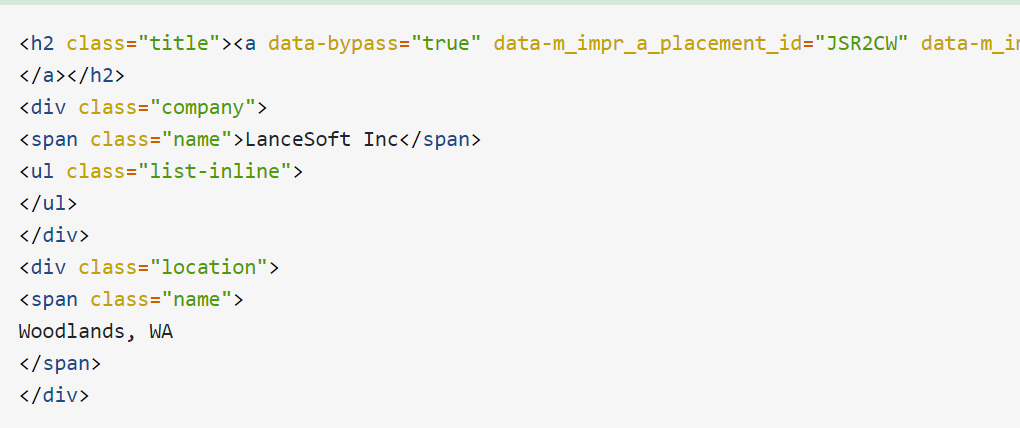

## Lets extract the text from the HTML Elements

For now, you only want to see the title, company, and location of each job posting. And behold! Beautiful Soup has got you covered. You can add .text to a Beautiful Soup object to return only the text content of the HTML elements that the object contains:

In [10]:
for job_elem in job_elems:
    title_elem = job_elem.find('h2', class_='title')
    company_elem = job_elem.find('div', class_='company')
    location_elem = job_elem.find('div', class_='location')
    print(title_elem.text) #changed line
    print(company_elem.text) #changed line
    print(location_elem.text) #changed line
    print()

Software Engineer - Full Stack - Sydney, New South Wales


MRI Software





Sydney, NSW





AttributeError: 'NoneType' object has no attribute 'text'

### AHHHH AN ATTRIBUTE ERROR. Why did we get that?

 Take a step back and inspect your previous results. Were there any items with a value of None? You might have noticed that the structure of the page is not entirely uniform. There could be an advertisement in there that displays in a different way than the normal job postings, which may return different results. For this properly, you can safely disregard the problematic element and skip over it while parsing the HTML.

In [11]:
for job_elem in job_elems:
    title_elem = job_elem.find('h2', class_='title')
    company_elem = job_elem.find('div', class_='company')
    location_elem = job_elem.find('div', class_='location')
    if None in (title_elem, company_elem, location_elem): #New Line
        continue                                          #New Line
    print(title_elem.text.strip()) #Changed line
    print(company_elem.text.strip()) #changed line
    print(location_elem.text.strip()) #changed line
    print()

Software Engineer - Full Stack - Sydney, New South Wales
MRI Software
Sydney, NSW

Technical Support Engineer 3 (Messaging)
Twilio
Melbourne, Victoria, VIC

Technical Support Engineer 3 (Messaging)
Twilio
Sydney, New South Wales, NSW

Sales Engineer - Commercial Real Estate SaaS - Sydney, New South Wales
MRI Software
Sydney, NSW

Tech Intern: Software Engineering
Comcast
New York, WA

Test Analysts & Senior Test Analysts
Dialog Group
Brisbane, QLD

Customer Experience Technical Analyst - Sydney, New South Wales
Mediaocean
Sydney, NSW

Consultant / Senior Consultant
Randstad ANZ
Melbourne, VIC

Account Executive - APAC
Uptake
Perth, Western Australia, Australia

Intern - Software Engineer - QA 2021 US
Okta
Bellevue,WA, San Jose,CA, San Francisco, CA, CA

Performance Test Engineer
Mphasis
Phoenix, AZ

Software Architect - Sydney, New South Wales
MRI Software
Sydney, NSW

Test Engineer
Dialog Group
Melbourne CBD, VIC

Senior Manager, Enterprise Sales, ANZ
Twilio
Sydney, New South Wales, N

Feel free to explore why one of the elements is returned as None. You can use the conditional statement you wrote above to print() out and inspect the relevant element in more detail. What do you think is going on there?

Notice what we added to get rid of all that extra whitespave?? Since you’re now working with Python strings, you can .strip() the superfluous whitespace. You can also apply any other familiar Python string methods to further clean up your text.

## Find Elements by Class Name and Text Content

By now, you’ve cleaned up the list of jobs that you saw on the website. While that’s pretty neat already, you can make your script more useful. However, not all of the job listings seem to be developer jobs that you’d be interested in as a Python developer. So instead of printing out all of the jobs from the page, you’ll first filter them for some keywords.

You know that job titles in the page are kept within < h2 > elements. To filter only for specific ones, you can use the string argument:

In [13]:
python_jobs = results.find_all('h2', string='Python Developer')

This code finds all < h2 > elements where the contained string matches 'Python Developer' exactly. Note that you’re directly calling the method on your first results variable. If you go ahead and print() the output of the above code snippet to your console, then you might be disappointed because it will probably be empty:



There was definitely a job with that title in the search results, so why is it not showing up? When you use string= like you did above, your program looks for exactly that string. Any differences in capitalization or whitespace will prevent the element from matching. So let's find a way to make the string more general.

## Pass a function to the Beautiful Soup Method

In addition to strings, you can often pass functions as arguments to Beautiful Soup methods. You can change the previous line of code to use a function instead

In [15]:
python_jobs = results.find_all('h2',
                               string=lambda text: 'python' in text.lower())

Now you’re passing an anonymous function to the string= argument. (remember we just learned about these) The lambda function looks at the text of each < h2 > element, converts it to lowercase, and checks whether the substring 'python' is found anywhere in there. Now you’ve got a match!

*Note: In case you still don’t get a match, try adapting your search string. The job offers on this page are constantly changing and there might not be a job listed that includes the substring 'python' in its title at the time that you’re working through this project.*

The process of finding specific elements depending on their text content is a powerful way to filter your HTML response for the information that you’re looking for. Beautiful Soup allows you to use either exact strings or functions as arguments for filtering text in Beautiful Soup objects.

## HOMEWORK

You learned how to:

- Inspect the HTML structure of your target site with your browser’s developer tools
- Gain insight into how to decipher the data encoded in URLs
- Download the page’s HTML content using Python’s requests library
- Parse the downloaded HTML with Beautiful Soup to extract relevant information

Now I want you to conitue iterating on this project and add atleast one more aspect! For instance I added code to pull the link to actually apply to the job. Look into the online docuementation of Beautiful Soup and request to see what else you can do. If you are interested you could create a command line interface app that looks for Software Developer jobs in any location you define. What ever you do, make sure it is all in your git hub and please submit your git hub link! :) 

- - - 
<!--NAVIGATION-->
Module 13. | 
[WebScraping Project Part 1](./WebScrapingProjectPart1.ipynb) | [WebScraping Project Part 2](./WebScrapingProjectPart2.ipynb)  | **[WebScraping Project Part 3](./WebScrapingProjectPart3.ipynb)** | [WebScraping Project Final Code](./WebScrapingProjectFinalCode.ipynb)

- - -